In [3]:
import os
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk-17"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "\\bin;" + os.environ["PATH"]
os.environ["PYSPARK_PYTHON"] = r"C:\Users\kamal\AppData\Local\Programs\Python\Python310\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = r"C:\Users\kamal\AppData\Local\Programs\Python\Python310\python.exe"
os.environ["HADOOP_HOME"] = r"C:\\hadoop"
os.environ["PATH"] = os.environ["HADOOP_HOME"] + r"\bin;" + os.environ["PATH"]
from pyspark.sql import SparkSession
driver = SparkSession.builder.master("local[*]").getOrCreate()
data = driver.read.csv(r"C:\Users\kamal\OneDrive\Desktop\Anti-Spam\data\DataSet_Emails\DataSet_Emails.csv" , inferSchema=True , header=True , multiLine=True , escape='"' )

In [4]:
data.show()
print(driver.sparkContext.uiWebUrl)

+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|_c0|message_id|                text|label|label_text|             subject|             message|      date|
+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|  0|     33214|any software just...|    1|      spam|any software just...|understanding oem...|2005-06-18|
|  1|     11929|perspective on fe...|    0|       ham|perspective on fe...|19 th , 2 : 00 pm...|2001-06-19|
|  2|     19784|wanted to try ci ...|    1|      spam|wanted to try ci ...|viagra at $ 1 . 1...|2004-09-11|
|  3|      2209|enron / hpl actua...|    0|       ham|enron / hpl actua...|teco tap 30 . 000...|2000-12-12|
|  4|     15880|looking for cheap...|    1|      spam|looking for cheap...|water past also ,...|2005-02-13|
|  5|     15726|emerging growth s...|    1|      spam|emerging growth s...|vera ,\nvcsc - br...|2005-01-18|
|  6|     21384|internet pro

In [5]:
data.describe().show()

+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|summary|              _c0|        message_id|                text|             label|label_text|             subject|             message|
+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|  count|            31716|             31716|               31665|             31716|     31716|               31442|               31371|
|   mean|          15857.5|16854.187539412284|                NULL|0.5096165973010468|      NULL|            386429.0|            71403.25|
| stddev|9155.764905238666| 9734.616391716854|                NULL|0.4999153936875302|      NULL|  481877.22667086066|   136659.2035841348|
|    min|                0|                 0| ( b  $ b ! zck...|                 0|       ham|                ( b| & who wants to ...|
|    max|           

In [6]:
from pyspark.sql import functions as F
null_data = data.select([F.sum(F.col(c).isNull().cast("int")).alias(c)for c in data.columns])
null_data.show()

+---+----------+----+-----+----------+-------+-------+----+
|_c0|message_id|text|label|label_text|subject|message|date|
+---+----------+----+-----+----------+-------+-------+----+
|  0|         0|  51|    0|         0|    274|    345|   0|
+---+----------+----+-----+----------+-------+-------+----+



In [7]:
label = data.groupBy("label").count()
label.show()

+-----+-----+
|label|count|
+-----+-----+
|    1|16163|
|    0|15553|
+-----+-----+



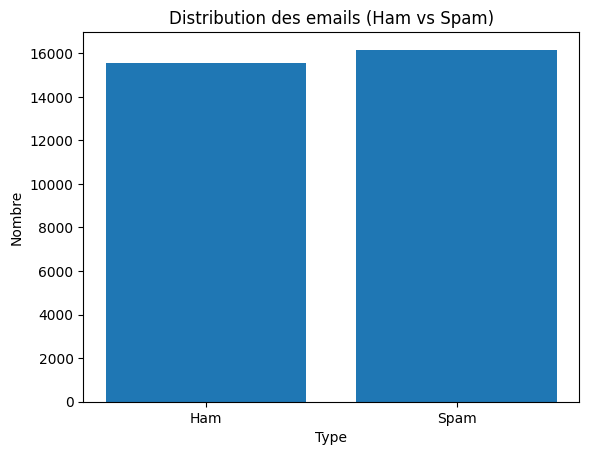

In [ ]:
label_counts = data.groupBy("label").count()
pdf = label_counts.toPandas()
import matplotlib.pyplot as plt
plt.bar(pdf['label'], pdf['count'])
plt.title('Distribution des emails (Ham vs Spam)')
plt.xlabel('Type')
plt.ylabel('Nombre')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()



In [ ]:
text = data.select(F.col("text")).show()
# text.show(5)

In [ ]:
cleaned_data = data.dropna(subset=["message", "text"])


In [ ]:
data.count()

In [ ]:
data   = data.dropDuplicates() 

In [13]:
clean_df = data.na.drop(subset=["text"  , "message" , "subject"])


In [14]:
from pyspark.sql import functions as F
null_data = clean_df.select([F.sum(F.col(c).isNull().cast("int")).alias(c)for c in data.columns])
null_data.show()

+---+----------+----+-----+----------+-------+-------+----+
|_c0|message_id|text|label|label_text|subject|message|date|
+---+----------+----+-----+----------+-------+-------+----+
|  0|         0|   0|    0|         0|      0|      0|   0|
+---+----------+----+-----+----------+-------+-------+----+



In [ ]:
data = data.drop(*["message_id" , "_c0" , "label_text" ,"date" , "subject" , "message"])

In [ ]:
words_df = clean_df.select(
    "label",
    F.explode(F.split("clean_text", " ")).alias("word")
).filter(F.length("word") > 1)

In [ ]:
print(data.columns)